In [32]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [33]:
# reading the xlsx file
df=pd.read_excel("New Bank_loan_data.xlsx") 

In [34]:
df.shape

(5000, 16)

In [35]:
df.head(10)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1
5,6,37,M,13,29.0,92121,4,0.4,2,155,Rent,0,0,0,1.0,0
6,7,53,M,27,72.0,91711,2,1.5,2,0,Rent,0,0,0,1.0,0
7,8,50,M,24,22.0,93943,1,0.3,3,0,Rent,0,0,0,0.0,1
8,9,35,M,10,81.0,90089,3,0.6,2,104,Rent,0,0,0,1.0,0
9,10,34,M,9,180.0,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0


<h3>Data pre-processing and Cleaning</h3>

In [36]:
# count of null values in each column
null_values = df.isnull().sum()
null_values

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [37]:
#checking the number of records of'Gender' column 
unique_values = df['Gender'].value_counts()
print(unique_values)
null_count = df['Gender'].isnull().sum()
print("Null rows are : ",null_count)

Gender
M    1677
F    1607
O      96
-      21
#       3
Name: count, dtype: int64
Null rows are :  1596


In [38]:
# Replace invalid entries with 'O'
df['Gender'] = df['Gender'].replace({'#': 'O', '-': 'O'})



print(df)

        ID  Age Gender  Experience  Income  ZIP Code  Family  CCAvg  \
0        1   25      M           1    49.0     91107       4    1.6   
1        2   45      M          19    34.0     90089       3    1.5   
2        3   39      M          15    11.0     94720       1    1.0   
3        4   35      M           9   100.0     94112       1    2.7   
4        5   35      M           8    45.0     91330       4    1.0   
...    ...  ...    ...         ...     ...       ...     ...    ...   
4995  4996   29    NaN           3    40.0     92697       1    1.9   
4996  4997   30    NaN           4    15.0     92037       4    0.4   
4997  4998   63    NaN          39    24.0     93023       2    0.3   
4998  4999   65    NaN          40    49.0     90034       3    0.5   
4999  5000   28    NaN           4    83.0     92612       3    0.8   

      Education  Mortgage Home Ownership Personal Loan  Securities Account  \
0             1         0     Home Owner             0               

In [39]:
# Initialize the imputer for categorical data with the 'most_frequent' strategy
imp_most_frequent = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Gender' column
df['Gender'] = imp_most_frequent.fit_transform(df[['Gender']]).ravel()
df['Gender']
# null_count = df['Gender'].isnull().sum()
# print("Null rows are : ",null_count)

0       M
1       M
2       M
3       M
4       M
       ..
4995    M
4996    M
4997    M
4998    M
4999    M
Name: Gender, Length: 5000, dtype: object

In [40]:

# Apply the imputer to the 'Home Ownership' column
df['Home Ownership'] = imp_most_frequent.fit_transform(df[['Home Ownership']]).ravel()
df['Home Ownership']

0         Home Owner
1               Rent
2               Rent
3               Rent
4               Rent
            ...     
4995    Home Mortage
4996    Home Mortage
4997    Home Mortage
4998    Home Mortage
4999    Home Mortage
Name: Home Ownership, Length: 5000, dtype: object

In [41]:
# null_count = df['Home Ownership'].isnull().sum()
# print("Null rows are : ",null_count)

In [42]:
# count of null values in each column
null_values = df.isnull().sum()
null_values

ID                     0
Age                    0
Gender                 0
Experience             0
Income                67
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Home Ownership         0
Personal Loan          0
Securities Account     0
CD Account             0
Online                40
CreditCard             0
dtype: int64

In [43]:
# for numerical values we use simple imputer with strategy mean
imp_mean = SimpleImputer(strategy='mean')
df[['Income', 'Online']] = imp_mean.fit_transform(df[['Income', 'Online']])

In [44]:
# count of null values in each column
null_values = df.isnull().sum()
null_values

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [45]:
# Now that we have dealt with all the null values, we label encode the categorical values

In [50]:
# Converting categorical variables
df['Gender'] = df['Gender'].replace({'M': '1', 'F': '2','O':'3'})
df['Home Ownership'] = df['Home Ownership'].replace({'Home Owner': '1', 'Rent': '2','Home Mortage':'3'})
# label_encoder = LabelEncoder()
# df.loc[:, 'Gender'] = label_encoder.fit_transform(df['Gender'])
# df.loc[:, 'Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])

In [51]:
df

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,1,49.0,91107,4,1.6,1,0,1,0,1,0,0.0,0
1,2,45,1,19,34.0,90089,3,1.5,1,0,2,0,1,0,0.0,0
2,3,39,1,15,11.0,94720,1,1.0,1,0,2,0,0,0,0.0,0
3,4,35,1,9,100.0,94112,1,2.7,2,0,2,0,0,0,0.0,0
4,5,35,1,8,45.0,91330,4,1.0,2,0,2,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,1,3,40.0,92697,1,1.9,3,0,3,0,0,0,1.0,0
4996,4997,30,1,4,15.0,92037,4,0.4,1,85,3,0,0,0,1.0,0
4997,4998,63,1,39,24.0,93023,2,0.3,3,0,3,0,0,0,0.0,0
4998,4999,65,1,40,49.0,90034,3,0.5,2,0,3,0,0,0,1.0,0


In [256]:
# # Normalizing/Scaling the data

# scaler = StandardScaler()
# df[['Income','Mortgage']] = scaler.fit_transform(df[['Income','Mortgage']])

In [77]:
df[df['Personal Loan']==1]

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,1,9,180.000000,93023,1,8.9,3,0,1,1,0,0,0.0,0
16,17,38,1,14,130.000000,95010,4,4.7,3,134,2,1,0,0,0.0,0
18,19,46,1,21,193.000000,91604,2,8.1,3,0,2,1,0,0,0.0,0
29,30,38,1,13,72.758159,94104,1,3.3,2,0,2,1,0,1,1.0,1
38,39,42,1,18,72.758159,94114,3,5.0,3,0,2,1,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,2,13,129.000000,92646,3,4.1,3,0,2,1,0,1,1.0,1
4927,4928,43,3,19,72.758159,94720,1,0.7,2,0,2,1,0,1,1.0,1
4941,4942,28,2,4,72.758159,90049,2,1.6,2,0,3,1,0,0,1.0,0
4962,4963,46,3,20,72.758159,90065,3,3.0,3,0,3,1,0,1,1.0,1


<h3>Exploratory Data Analysis</h3>

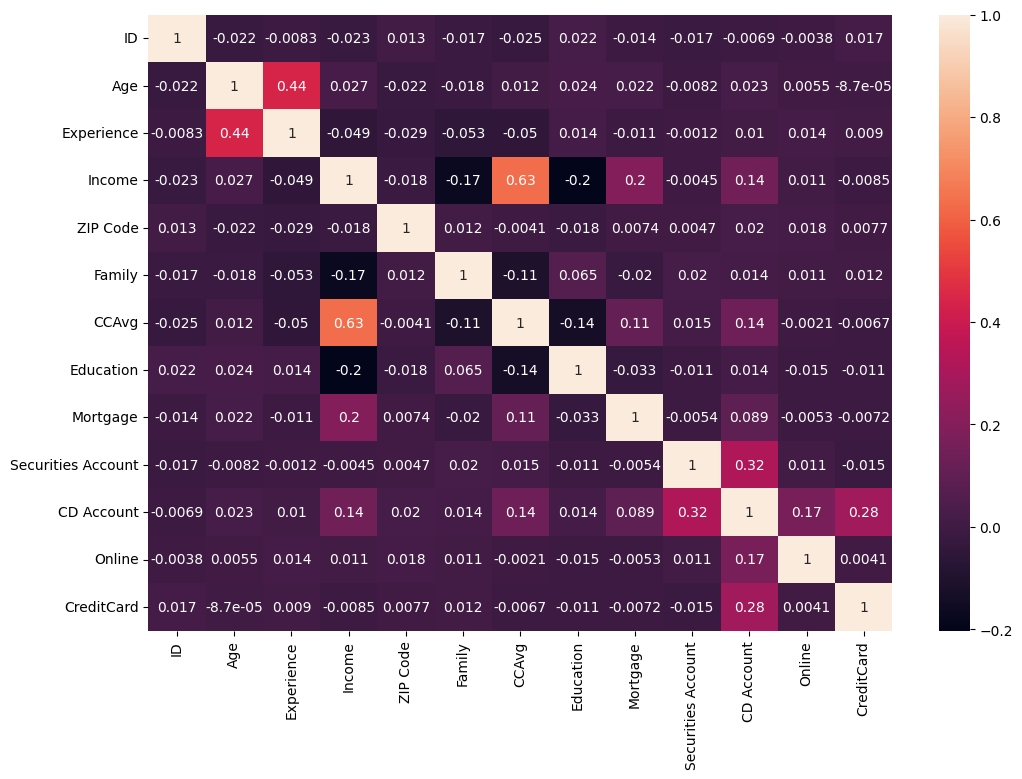

In [52]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

<p>From the above correlation graph:</p>
<li>There is a strong positive correlation between Age and Experience, which is expected because older individuals typically have more experience.</li>
<li>Higher income is associated with higher average credit card spending (CCAvg). This indicates that wealthier individuals tend to spend more on credit cards.</li>

In [53]:
print(df['Personal Loan'].unique())

[0 1 ' ']


In [54]:
print(df['Personal Loan'].value_counts())

Personal Loan
0    4520
1     479
        1
Name: count, dtype: int64


In [55]:
# df.dropna(subset=['Personal Loan'], inplace=True)
df = df[df['Personal Loan'] != ' ']

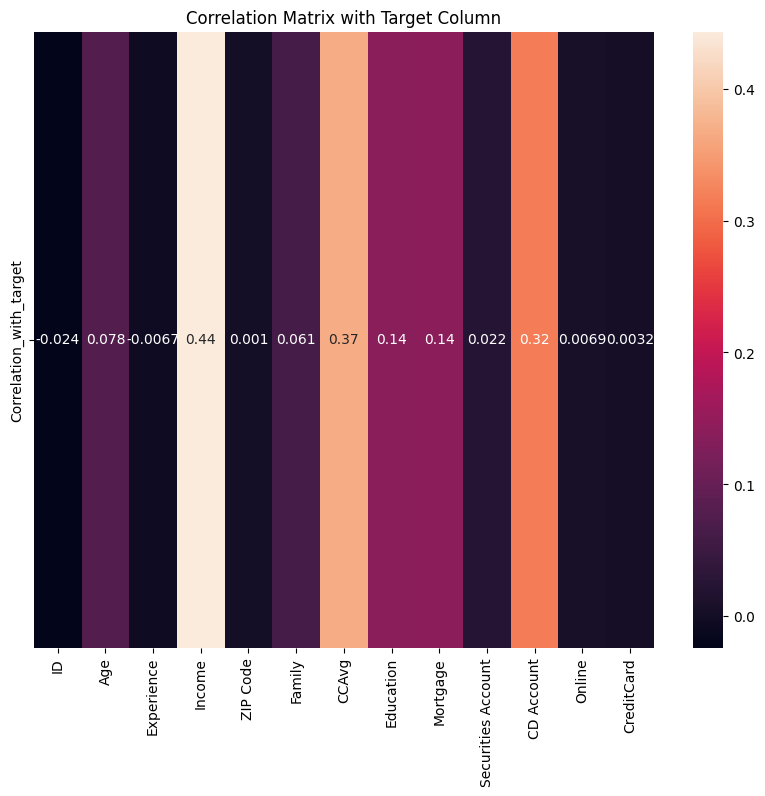

In [56]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_with_target = df[numeric_columns].corrwith(df['Personal Loan'])
correlation_with_target_df = correlation_with_target.to_frame(name='Correlation_with_target')
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target_df.transpose(), annot=True)
plt.title('Correlation Matrix with Target Column')
plt.show()

<p>There is high correlation of Income (0.44) , CCAvg (0.37) and CD account (0.32) with the target column. </p>

<h3>Training</h3>


In [57]:

# Spliting data into features and target and dropping unnecessary columns
X = df.drop(['ID', 'Personal Loan','ZIP Code'], axis=1)
y = df['Personal Loan']

In [58]:
# Spliting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded)

[0 0 0 ... 0 0 0]


In [60]:
y_train_encoded.dtype

dtype('int32')

In [61]:
y_train=y_train_encoded
y_test=y_test_encoded

In [62]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, tol=1e-4)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)



In [63]:
# Evaluate the model
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Logistic Regression - Precision: {precision_score(y_test, y_pred)}")
print(f"Logistic Regression - Recall: {recall_score(y_test, y_pred)}")
print(f"Logistic Regression - F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression - Accuracy: 0.945
Logistic Regression - Precision: 0.8524590163934426
Logistic Regression - Recall: 0.5306122448979592
Logistic Regression - F1 Score: 0.6540880503144654


In [64]:
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [65]:

# Evaluate the model
print(f"Random Forest - Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest - Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Random Forest - Recall: {recall_score(y_test, y_pred_rf)}")
print(f"Random Forest - F1 Score: {f1_score(y_test, y_pred_rf)}")

Random Forest - Accuracy: 0.981
Random Forest - Precision: 0.9876543209876543
Random Forest - Recall: 0.8163265306122449
Random Forest - F1 Score: 0.8938547486033519


<p>Based on these results, Random Forest generally outperforms Logistic Regression across all metrics (accuracy, precision, recall, and F1 score).</p>

In [66]:

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [80]:
# testing on a custom data
custom_data = {
    'ID': [12345678],
    'Age': [50],
    'Gender': [1],
    'Experience': [6],
    'Income': [55],
    'ZIP Code': [12345],
    'Family': [1],
    'CCAvg': [8.68],
    'Education': [3],
    'Mortgage': [0],
    'Home Ownership': [1],
    'Securities Account': [0],
    'CD Account': [1],
    'Online': [0],
    'CreditCard': [1]
}

custom_df = pd.DataFrame(custom_data)
# Load the trained model
model = joblib.load('random_forest_model.pkl')  

X_custom = custom_df.drop(columns=['ID', 'ZIP Code'],) 
predictions = model.predict(X_custom)
print(predictions)

[1]
